
# **CÓDIGO DE INFORME DE AVANCE 1.**







**Integrantes**

*   Alonso Vásquez M.
*   Ignacio Canales D.
*   José Muñoz V.
*   Sebastián Vásquez



## **Análisis exploratorio de datos**


In [48]:
# 1. LIBRERÍAS
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [49]:
# 2. CARGA DE DATOS
# ===============================================

#from google.colab import files
#uploaded = files.upload()

# Lee la base en formato Stata (.dta)
df = pd.read_stata("casestudy_dropout.dta")

In [50]:
# 3. TAMAÑO Y ESTRUCTURA DEL CONJUNTO DE DATOS
# ===============================================

# ---- Dimensiones generales ----
print("Dimensiones del conjunto de datos:")
print(f"Filas (observaciones): {df.shape[0]}")
print(f"Columnas (variables):  {df.shape[1]}")

# ---- Tipos de variables ----
print("\n Tipos de datos por variable:")
print(df.dtypes)

# Contar por tipo de dato
tipo_var = df.dtypes.value_counts()
print("\nResumen de tipos de variables:")
print(tipo_var)

# ---- Variables numéricas, categóricas y fechas ----
numeric_vars = df.select_dtypes(include=np.number).columns.tolist()
categorical_vars = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nVariables numéricas: {len(numeric_vars)}")
print(numeric_vars)

# Detectar si hay variables de tipo fecha (datetime)
date_vars = [col for col in df.columns if np.issubdtype(df[col].dtype, np.datetime64)]
print(f"\nVariables de tipo fecha: {date_vars}")

# ---- Mostrar primeras filas para inspección general ----
print("\nPrimeras observaciones del dataset:")
display(df.head())

# ---- Unidad de análisis ----
print("\n Unidad de análisis: cada fila representa un estudiante desvinculado del sistema escolar en 2022.")

Dimensiones del conjunto de datos:
Filas (observaciones): 8516
Columnas (variables):  19

 Tipos de datos por variable:
IDstudent                         float32
IDschool                            int32
SchoolGrade2022                   float32
DropoutDate                datetime64[ns]
DayOfWeekDroppedOut               float32
PrioritaryStudentIn2021              int8
Female                               int8
Age                                  int8
GPAin2021                         float64
AttendanceIn2021                     int8
GraduatedIn2021                   float32
Migrant                           float32
ListedInDropoutReport             float32
SchoolPrincipalADP                float32
EnrolledByAug312022               float32
GraduatedIn2022                   float32
MunicipalSchool                   float32
SchoolDaysFromMay302022             int16
DroppedOutMay30Before             float32
dtype: object

Resumen de tipos de variables:
float32           11
int8           

,IDstudent,IDschool,SchoolGrade2022,DropoutDate,DayOfWeekDroppedOut,PrioritaryStudentIn2021,Female,Age,GPAin2021,AttendanceIn2021,GraduatedIn2021,Migrant,ListedInDropoutReport,SchoolPrincipalADP,EnrolledByAug312022,GraduatedIn2022,MunicipalSchool,SchoolDaysFromMay302022,DroppedOutMay30Before
0,1.0,1,12.0,2022-06-17,5.0,0,0,18,2.0,55,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-14,0.0
1,2.0,1,9.0,2022-05-13,5.0,0,1,15,2.5,55,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11,1.0
2,3.0,1,10.0,2022-04-20,3.0,1,1,14,4.9,88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,28,1.0
3,4.0,4,10.0,2022-05-02,1.0,1,1,14,5.8,90,1.0,0.0,1.0,1.0,0.0,0.0,1.0,20,1.0
4,5.0,4,12.0,2022-06-15,3.0,0,1,17,4.6,100,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-12,0.0



 Unidad de análisis: cada fila representa un estudiante desvinculado del sistema escolar en 2022.


Estadísticos descriptivos generales:


,count,mean,min,25%,50%,75%,max,std
IDstudent,8516.0,4258.5,1.0,2129.75,4258.5,6387.25,8516.0,2458.501709
IDschool,8516.0,11083.22675,1.0,4450.0,9697.5,14676.0,42061.0,8750.797894
SchoolGrade2022,8516.0,7.397252,1.0,5.0,8.0,10.0,12.0,3.145355
DropoutDate,8516,2022-05-31 11:43:25.730389760,2022-04-18 00:00:00,2022-05-05 00:00:00,2022-05-26 00:00:00,2022-06-23 00:00:00,2022-07-29 00:00:00,NaN
DayOfWeekDroppedOut,8516.0,2.893729,1.0,2.0,3.0,4.0,5.0,1.407505
PrioritaryStudentIn2021,8516.0,0.646783,0.0,0.0,1.0,1.0,1.0,0.477998
Female,8516.0,0.530531,0.0,0.0,1.0,1.0,1.0,0.499096
Age,8516.0,12.054368,6.0,9.0,13.0,15.0,19.0,3.45979
GPAin2021,8416.0,5.51376,1.0,4.9,5.6,6.3,7.0,1.018228
AttendanceIn2021,8516.0,82.943283,0.0,85.0,86.0,96.0,100.0,22.168653



A continuación se muestran la proporción de cada variable binaria:
PrioritaryStudentIn2021: 64.7% con valor 1
Female: 53.1% con valor 1
GraduatedIn2021: 90.7% con valor 1
Migrant: 11.7% con valor 1
ListedInDropoutReport: 18.2% con valor 1
SchoolPrincipalADP: 44.6% con valor 1
EnrolledByAug312022: 78.8% con valor 1
GraduatedIn2022: 69.2% con valor 1
MunicipalSchool: 53.9% con valor 1
DroppedOutMay30Before: 54.1% con valor 1

Distribución de variables numéricas:


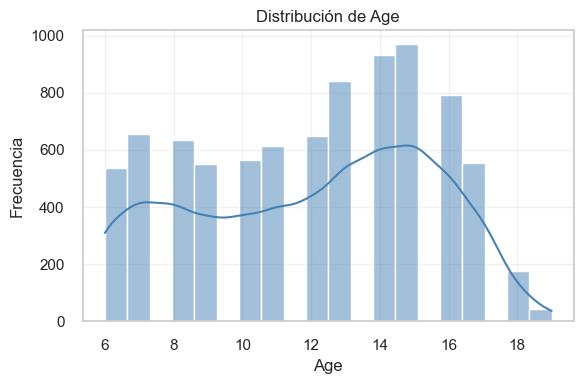

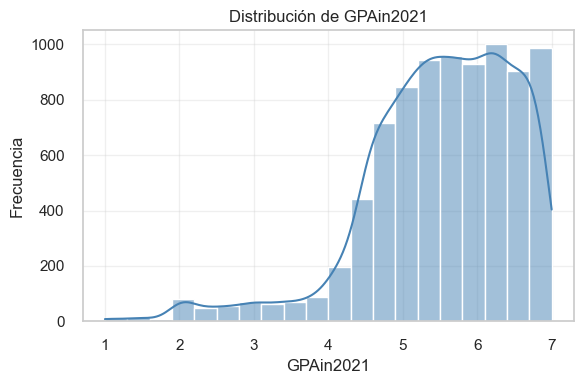

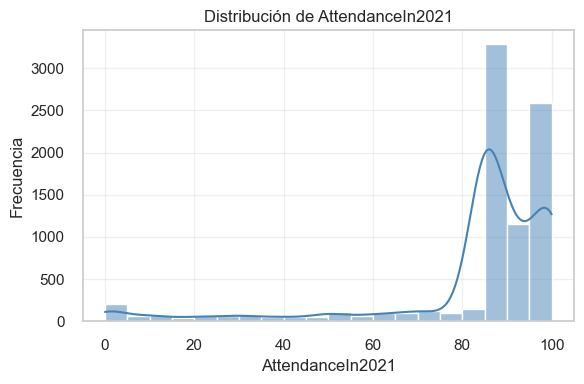

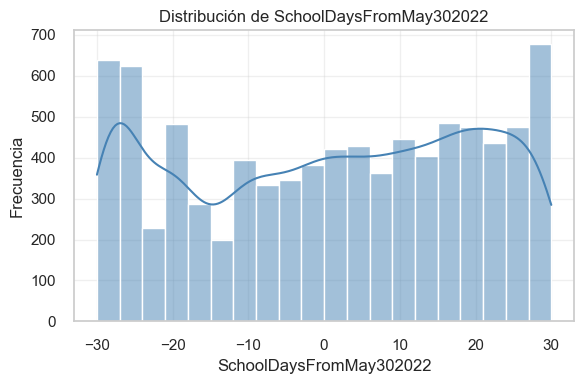

In [51]:
# 4. ESTADÍSTICOS DESCRIPTIVOS
# ===============================================
# ---- Medidas de tendencia central y dispersión ----
print("Estadísticos descriptivos generales:")
desc = df.describe(percentiles=[0.25, 0.5, 0.75]).transpose()
display(desc)

# 4.1 PROPORCIONES DE VARIABLES BINARIAS
# Seleccionamos columnas binarias (solo 0 y 1)
binary_vars = [col for col in df.columns
               if df[col].dropna().isin([0,1]).all() and df[col].nunique() == 2]
print(f"\nA continuación se muestran la proporción de cada variable binaria:")

# Calculamos proporciones
for col in binary_vars:
    prop = df[col].mean() * 100
    print(f"{col}: {prop:.1f}% con valor 1")

# 4.2 DISTRIBUCIONES: HISTOGRAMAS Y COUNTPLOTS
# --- 1. Variables numéricas (histogramas) ---
numeric_vars = ['Age', 'GPAin2021', 'AttendanceIn2021', 'SchoolDaysFromMay302022']

print("\nDistribución de variables numéricas:")

for col in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True, color='steelblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()



In [52]:
# 5. ANÁLISIS DE DUPLICADOS
# ===============================================

# Revisión de filas completamente duplicadas
total_duplicadas = df.duplicated().sum()
print(f" Filas completamente duplicadas en el dataset: {total_duplicadas}")

# Si existen, se pueden mostrar (máximo 5 ejemplos)
if total_duplicadas > 0:
    print("\nEjemplos de filas duplicadas:")
    display(df[df.duplicated()].head())
else:
    print(" No se encontraron filas completamente duplicadas.")

# Revisión de duplicados en el identificador del estudiante (IDstudent)
duplicados_id = df['IDstudent'].duplicated().sum()
print(f"\n Registros con IDstudent repetido: {duplicados_id}")

# Si hubiera, mostramos los casos específicos
if duplicados_id > 0:
    print("\nEjemplos de ID duplicados:")
    display(df[df['IDstudent'].duplicated(keep=False)].sort_values('IDstudent').head())
else:
    print(" No se encontraron IDstudent duplicados; cada registro corresponde a un estudiante único.")


 Filas completamente duplicadas en el dataset: 0
 No se encontraron filas completamente duplicadas.

 Registros con IDstudent repetido: 0
 No se encontraron IDstudent duplicados; cada registro corresponde a un estudiante único.


In [53]:
# 6. ANÁLISIS DE VALORES FALTANTES (NAs)
# ===============================================


# Calcular cantidad y porcentaje de NAs
na_count = df.isna().sum()
na_percent = (na_count / len(df)) * 100

# Filtrar solo variables con al menos un NA
na_summary = pd.DataFrame({
    'Valores faltantes': na_count[na_count > 0],
    '% del total': na_percent[na_percent > 0].round(2)
})

# Mostrar resultado
if na_summary.empty:
    print(" No se encontraron valores faltantes en ninguna variable.")
else:
    print(" Variables con valores faltantes:")
    display(na_summary)

# ===============================================
#Nos dimos cuenta que los que tenían NA en GPA2021 es por que tenian 0% de asistencia en 2021.
# ===============================================

# Verificar relación entre GPAin2021 y AttendanceIn2021
faltantes_gpa = df[df['GPAin2021'].isna()]
print(f"Registros con GPAin2021 faltante: {len(faltantes_gpa)}")
print("\nDistribución de asistencia en esos casos:")
print(faltantes_gpa['AttendanceIn2021'].value_counts())

# Confirmar patrón
if (faltantes_gpa['AttendanceIn2021'] == 0).all():
    print("\nTodos los NAs en GPAin2021 corresponden a estudiantes con asistencia 0 en 2021.")

# Imputar con 0 porque no tuvieron rendimiento evaluado
df['GPAin2021'] = df['GPAin2021'].fillna(1)
print("\n Se imputó la nota 1.0 en todos los NA´s"),
print("\nValores faltantes en GPAin2021 después de imputar:",
      df['GPAin2021'].isna().sum())

 Variables con valores faltantes:


,Valores faltantes,% del total
GPAin2021,100,1.17


Registros con GPAin2021 faltante: 100

Distribución de asistencia en esos casos:
AttendanceIn2021
0    100
Name: count, dtype: int64

Todos los NAs en GPAin2021 corresponden a estudiantes con asistencia 0 en 2021.

 Se imputó la nota 1.0 en todos los NA´s

Valores faltantes en GPAin2021 después de imputar: 0


 Revisión de rangos lógicos (valores fuera de rango esperado):

Age: 0 valores fuera de [6, 19]
GPAin2021: 0 valores fuera de [1, 7]
AttendanceIn2021: 0 valores fuera de [0, 100]
SchoolGrade2022: 0 valores fuera de [1, 12]
SchoolDaysFromMay302022: 0 valores fuera de [-60, 60]

 Revisión estadística (IQR):



,Variable,Límite inferior,Límite superior,Outliers detectados
0,Age,0.0,24.0,0
1,GPAin2021,2.8,8.4,339
2,AttendanceIn2021,68.5,112.5,1089
3,SchoolGrade2022,-2.5,17.5,0
4,SchoolDaysFromMay302022,-68.0,68.0,0



Ejemplos de outliers en GPAin2021:


,GPAin2021
0,2.0
1,2.5
9,1.0
69,1.0
95,1.0



Ejemplos de outliers en AttendanceIn2021:


,AttendanceIn2021
0,55
1,55
9,0
67,28
69,0



 Boxplots de las variables numéricas relevantes:



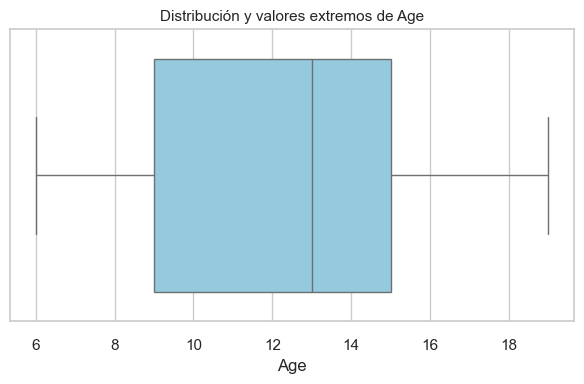

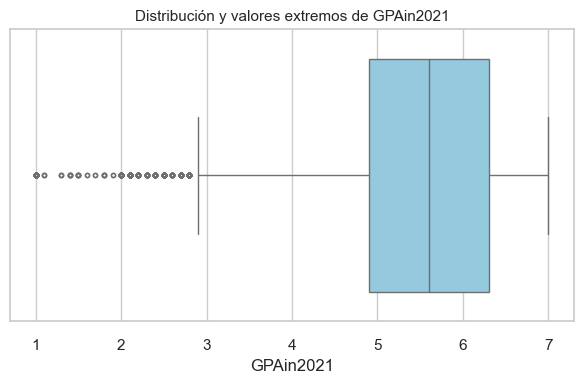

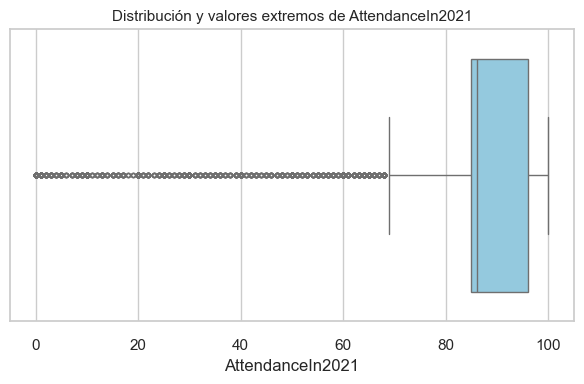

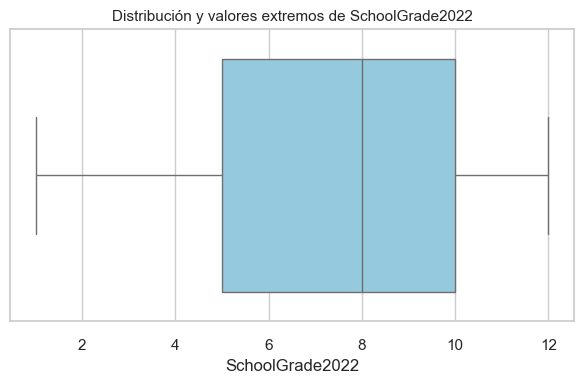

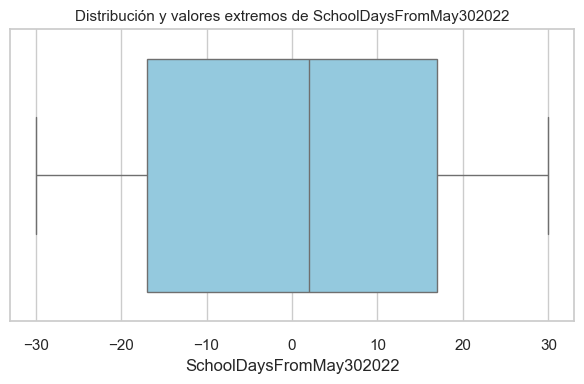

In [54]:
# 7. ANÁLISIS DE VALORES EXTREMOS (OUTLIERS)
# ===============================================

# Variables relevantes para revisar outliers
num_vars_outliers = ['Age', 'GPAin2021', 'AttendanceIn2021',
                     'SchoolGrade2022', 'SchoolDaysFromMay302022']

# ---- 1️ Detección por rango esperado ----
print(" Revisión de rangos lógicos (valores fuera de rango esperado):\n")

rangos = {
    'Age': (6, 19),
    'GPAin2021': (1, 7),
    'AttendanceIn2021': (0, 100),
    'SchoolGrade2022': (1, 12),
    'SchoolDaysFromMay302022': (-60, 60)  # rango razonable
}

for var, (low, high) in rangos.items():
    fuera_rango = df[(df[var] < low) | (df[var] > high)]
    print(f"{var}: {fuera_rango.shape[0]} valores fuera de [{low}, {high}]")

# ---- 2️ Detección por método IQR ----
print("\n Revisión estadística (IQR):\n")

iqr_summary = []
for var in num_vars_outliers:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[var] < lower) | (df[var] > upper)]
    iqr_summary.append({
        'Variable': var,
        'Límite inferior': round(lower,2),
        'Límite superior': round(upper,2),
        'Outliers detectados': outliers.shape[0]
    })

iqr_summary = pd.DataFrame(iqr_summary)
display(iqr_summary)

# ---- 3️ Mostrar ejemplos de outliers (si existen) ----
for var in num_vars_outliers:
    outliers = df[(df[var] < df[var].quantile(0.25) - 1.5 * (df[var].quantile(0.75) - df[var].quantile(0.25))) |
                  (df[var] > df[var].quantile(0.75) + 1.5 * (df[var].quantile(0.75) - df[var].quantile(0.25)))]
    if not outliers.empty:
        print(f"\nEjemplos de outliers en {var}:")
        display(outliers[[var]].head())

# ===============================================
# VISUALIZACIÓN INTUITIVA DE VALORES EXTREMOS

print("\n Boxplots de las variables numéricas relevantes:\n")

# Configuración de estilo
sns.set(style="whitegrid")

# Crear un boxplot por cada variable numérica relevante
for var in num_vars_outliers:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[var], color='skyblue', fliersize=3)
    plt.title(f'Distribución y valores extremos de {var}', fontsize=11)
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()


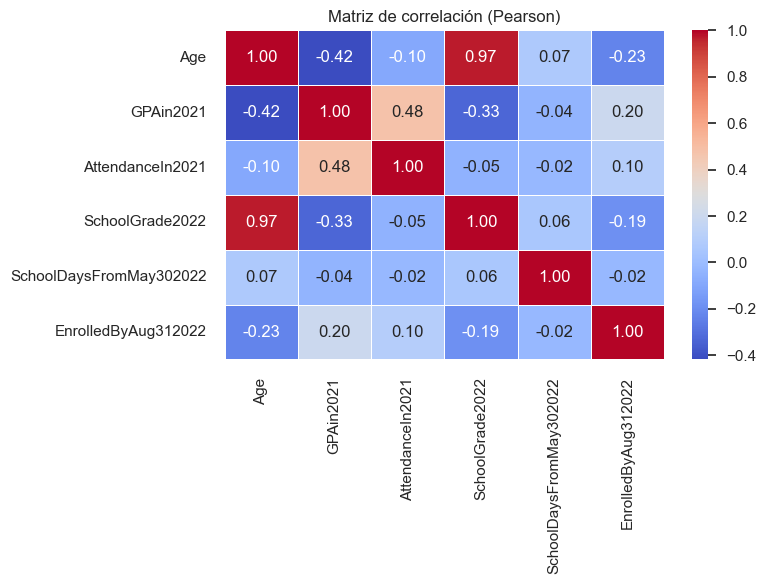

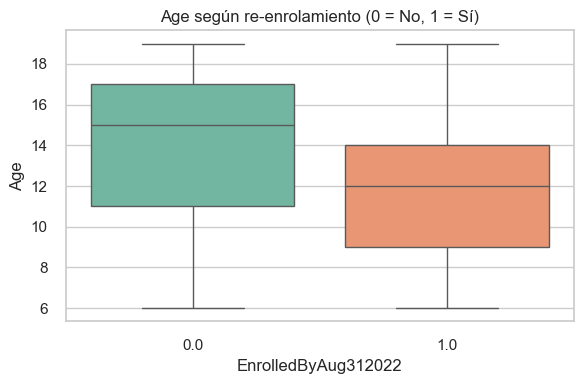

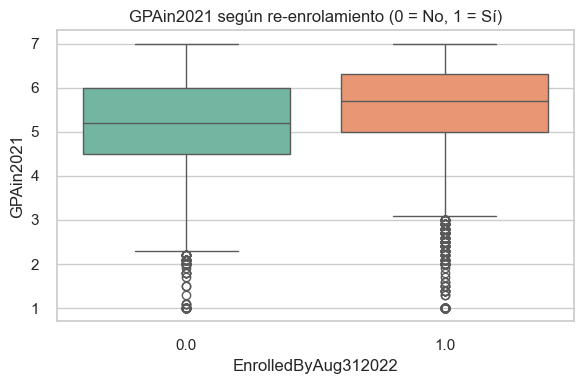

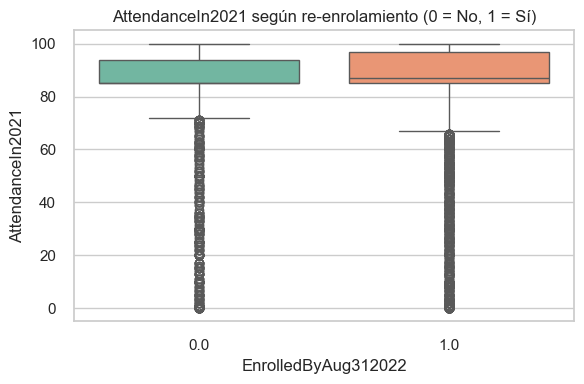

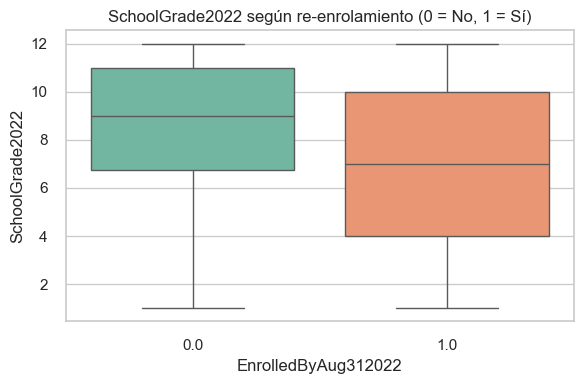

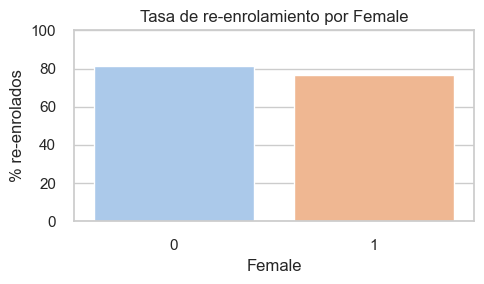

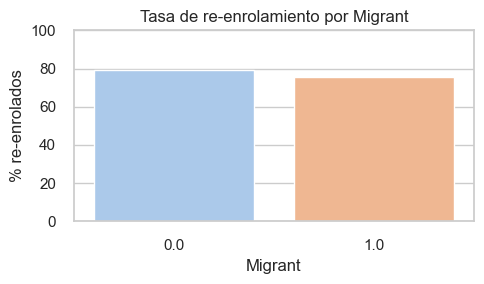

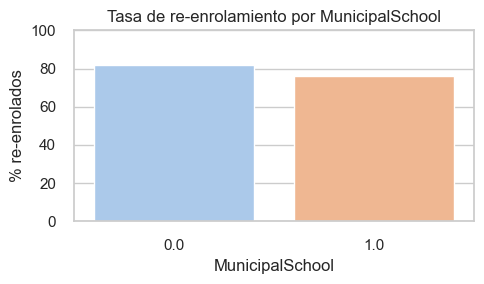

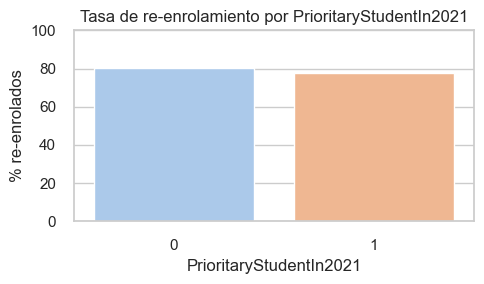

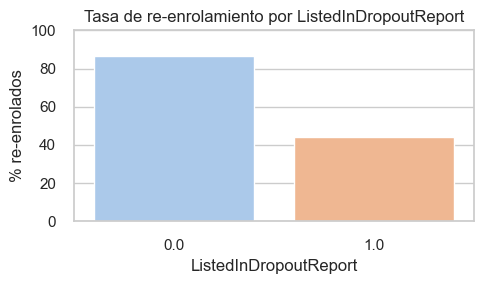

In [55]:
# 8. RELACIONES ENTRE VARIABLES
# ===============================================


# --- 1. Matriz de correlación entre variables numéricas ---
corr_vars = ['Age', 'GPAin2021', 'AttendanceIn2021',
             'SchoolGrade2022', 'SchoolDaysFromMay302022', 'EnrolledByAug312022']

corr_matrix = df[corr_vars].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación (Pearson)')
plt.tight_layout()
plt.show()

# --- 2. Comparaciones numéricas según la variable objetivo ---
num_vars = ['Age', 'GPAin2021', 'AttendanceIn2021', 'SchoolGrade2022']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='EnrolledByAug312022', y=var, data=df, palette='Set2')
    plt.title(f'{var} según re-enrolamiento (0 = No, 1 = Sí)')
    plt.xlabel('EnrolledByAug312022')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

# --- 3. Comparaciones categóricas (porcentaje de re-enrolados) ---
cat_vars = ['Female', 'Migrant', 'MunicipalSchool',
            'PrioritaryStudentIn2021', 'ListedInDropoutReport']

for var in cat_vars:
    prop = df.groupby(var)['EnrolledByAug312022'].mean().reset_index()
    prop['EnrolledByAug312022'] *= 100

    plt.figure(figsize=(5,3))
    sns.barplot(x=var, y='EnrolledByAug312022', data=prop, palette='pastel')
    plt.title(f'Tasa de re-enrolamiento por {var}')
    plt.ylabel('% re-enrolados')
    plt.xlabel(var)
    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()


# 9 
Buscando mejores modelos con pycaret.

In [56]:
import pycaret
from pycaret.classification import *
# Configuración del entorno de PyCaret
# Configuración corregida para PyCaret 3.x
clf = setup(data=df, 
            target='EnrolledByAug312022', 
            ignore_features=['IDstudent'],
            session_id=123) 
# Nota: setup() ya se encarga de la imputación simple si quedan nulos, 

# Modelado automático con PyCaret
best_model = compare_models()
print(best_model)




,Description,Value
0,Session id,123
1,Target,EnrolledByAug312022
2,Target type,Binary
3,Original data shape,"(8516, 19)"
4,Transformed data shape,"(8516, 20)"
5,Transformed train set shape,"(5961, 20)"
6,Transformed test set shape,"(2555, 20)"
7,Ignore features,1
8,Numeric features,16
9,Date features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9143,0.9418,0.9508,0.9412,0.9459,0.7397,0.7408,0.1320
lightgbm,Light Gradient Boosting Machine,0.9118,0.9366,0.9497,0.9391,0.9443,0.7317,0.7327,0.4240
rf,Random Forest Classifier,0.9114,0.9347,0.9508,0.9378,0.9442,0.7298,0.7308,0.1110
lr,Logistic Regression,0.9101,0.9351,0.9459,0.9404,0.9431,0.7291,0.7300,1.3190
ada,Ada Boost Classifier,0.9092,0.9376,0.9463,0.9391,0.9426,0.7256,0.7265,0.0530
et,Extra Trees Classifier,0.9087,0.9314,0.9474,0.9376,0.9424,0.7228,0.7237,0.0810
ridge,Ridge Classifier,0.9030,0.9368,0.9308,0.9454,0.9380,0.7160,0.7169,0.0120
xgboost,Extreme Gradient Boosting,0.9027,0.9274,0.9461,0.9315,0.9387,0.7026,0.7035,0.1510
lda,Linear Discriminant Analysis,0.8943,0.9368,0.9112,0.9526,0.9314,0.7020,0.7057,0.0120
dt,Decision Tree Classifier,0.8671,0.8073,0.9114,0.9194,0.9153,0.6070,0.6078,0.0160


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


haciendo grid search para buscar la mejor combinación de hiperparametros.

In [57]:
# 1. Crear el modelo base (el que ganó)
gbc = create_model('gbc')

# 2. Definir la grilla de hiperparámetros personalizada para Gradient Boosting
# Estos son los parámetros que más impactan en este algoritmo
params_grid = {
    'n_estimators': [100, 200, 300],      # Número de árboles (más suele ser mejor, pero más lento)
    'learning_rate': [0.01, 0.1, 0.2],    # Velocidad de aprendizaje (menor requiere más árboles)
    'max_depth': [3, 5, 7],               # Profundidad del árbol (controla el sobreajuste)
    'min_samples_split': [2, 5, 10],      # Mínimo de muestras para dividir
    'subsample': [0.8, 1.0]               # Fracción de datos usados para cada árbol
}

# 3. Ejecutar el Grid Search optimizando AUC
tuned_gbc = tune_model(gbc,
                       custom_grid = params_grid,
                       optimize = 'AUC') # Optimizamos AUC para balancear ambas clases

# 4. Ver los resultados finales y los parámetros ganadores
print(tuned_gbc)
print(tuned_gbc.get_params())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9095,0.9272,0.9574,0.9298,0.9434,0.7186,0.7206
1,0.9228,0.9471,0.9596,0.9435,0.9515,0.7630,0.7637
2,0.9060,0.9400,0.9532,0.9295,0.9412,0.7080,0.7094
3,0.9161,0.9576,0.9426,0.9506,0.9466,0.7513,0.7514
4,0.9128,0.9503,0.9468,0.9428,0.9448,0.7368,0.7368
5,0.9161,0.9374,0.9275,0.9645,0.9457,0.7621,0.7649
6,0.9178,0.9447,0.9574,0.9393,0.9483,0.7483,0.7491
7,0.9245,0.9379,0.9552,0.9492,0.9522,0.7729,0.7730
8,0.9128,0.9375,0.9552,0.9353,0.9451,0.7321,0.7331


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9079,0.9245,0.9553,0.9296,0.9423,0.7143,0.7159
1,0.9279,0.9470,0.9596,0.9495,0.9545,0.7804,0.7807
2,0.9094,0.9392,0.9532,0.9333,0.9432,0.7201,0.7211
3,0.9211,0.9582,0.9468,0.9529,0.9498,0.7655,0.7656
4,0.9144,0.9528,0.9468,0.9448,0.9458,0.7426,0.7426
5,0.9178,0.9375,0.9318,0.9626,0.9469,0.7650,0.7670
6,0.9178,0.9435,0.9574,0.9393,0.9483,0.7483,0.7491
7,0.9262,0.9396,0.9616,0.9455,0.9535,0.7747,0.7753
8,0.9144,0.9382,0.9531,0.9391,0.9460,0.7396,0.7401


Fitting 10 folds for each of 10 candidates, totalling 100 fits
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_chang

viendo matriz de confusión

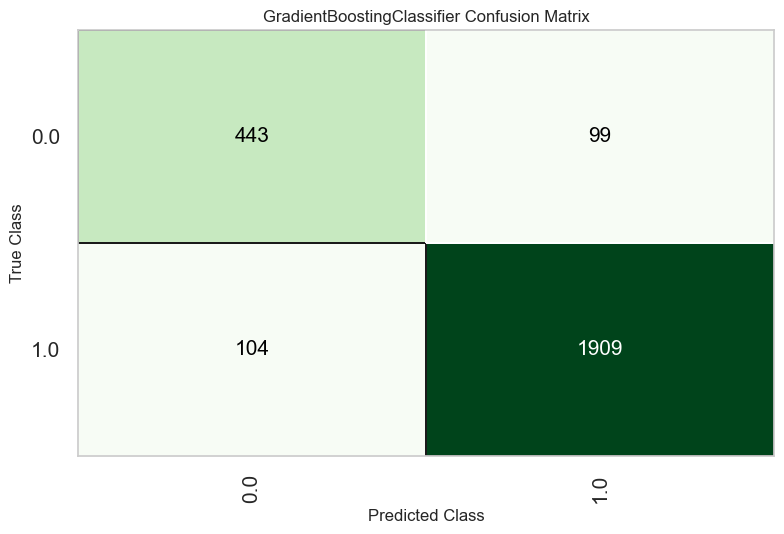

In [58]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

viendo importancia de las variables en el modelo

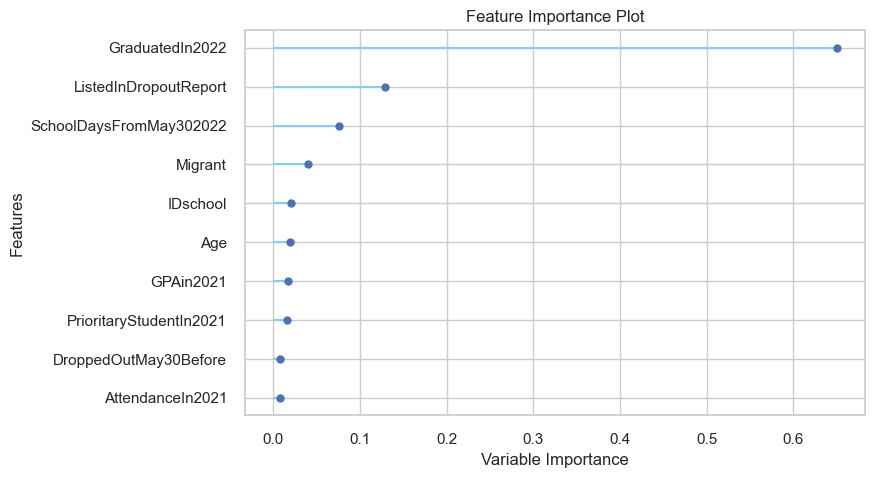

In [59]:
# Gráfico de importancia de variables
plot_model(tuned_gbc, plot='feature')

Como se detecto que graduatedIn2022 tiene mucha importancia y significa los jovenes graduados del colegio en el 2022, se decide aplicar pycaret sin contemplar esta variable.

In [60]:
import pycaret
from pycaret.classification import *
# Configuración del entorno de PyCaret
# Configuración corregida para PyCaret 3.x
clf = setup(data=df, 
            target='EnrolledByAug312022', 
            ignore_features=['IDstudent', 'GraduatedIn2022'],
            session_id=123) 
# Nota: setup() ya se encarga de la imputación simple si quedan nulos, 
# pero tu limpieza manual previa es mejor.
# Modelado automático con PyCaret
best_model = compare_models()
print(best_model)


,Description,Value
0,Session id,123
1,Target,EnrolledByAug312022
2,Target type,Binary
3,Original data shape,"(8516, 19)"
4,Transformed data shape,"(8516, 19)"
5,Transformed train set shape,"(5961, 19)"
6,Transformed test set shape,"(2555, 19)"
7,Ignore features,2
8,Numeric features,15
9,Date features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8324,0.8390,0.9502,0.8537,0.8993,0.4078,0.4303,0.1250
rf,Random Forest Classifier,0.8297,0.8219,0.9393,0.8581,0.8968,0.4155,0.4305,0.1010
lightgbm,Light Gradient Boosting Machine,0.8260,0.8255,0.9344,0.8577,0.8943,0.4072,0.4200,0.2200
et,Extra Trees Classifier,0.8239,0.8084,0.9301,0.8583,0.8927,0.4050,0.4159,0.0930
ada,Ada Boost Classifier,0.8229,0.8263,0.9453,0.8475,0.8937,0.3718,0.3927,0.0520
ridge,Ridge Classifier,0.8207,0.8159,0.9470,0.8445,0.8927,0.3568,0.3799,0.0110
xgboost,Extreme Gradient Boosting,0.8183,0.8061,0.9235,0.8571,0.8890,0.3924,0.4018,0.0840
lda,Linear Discriminant Analysis,0.8161,0.8159,0.9218,0.8561,0.8877,0.3847,0.3933,0.0150
lr,Logistic Regression,0.8150,0.8128,0.9429,0.8415,0.8892,0.3377,0.3595,0.0620
nb,Naive Bayes,0.7970,0.7464,0.9067,0.8466,0.8755,0.3283,0.3347,0.0110


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


luego se hace grid search para buscar la mejor combinación de hiperparametros.

In [61]:
# 1. Crear el modelo base (el que ganó)
gbc = create_model('gbc')

# 2. Definir la grilla de hiperparámetros personalizada para Gradient Boosting
# Estos son los parámetros que más impactan en este algoritmo
params_grid = {
    'n_estimators': [100, 200, 300],      # Número de árboles (más suele ser mejor, pero más lento)
    'learning_rate': [0.01, 0.1, 0.2],    # Velocidad de aprendizaje (menor requiere más árboles)
    'max_depth': [3, 5, 7],               # Profundidad del árbol (controla el sobreajuste)
    'min_samples_split': [2, 5, 10],      # Mínimo de muestras para dividir
    'subsample': [0.8, 1.0]               # Fracción de datos usados para cada árbol
}

# 3. Ejecutar el Grid Search optimizando AUC
tuned_gbc = tune_model(gbc,
                       custom_grid = params_grid,
                       optimize = 'AUC') # Optimizamos AUC para balancear ambas clases

# 4. Ver los resultados finales y los parámetros ganadores
print(tuned_gbc)
print(tuned_gbc.get_params())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8291,0.8238,0.9617,0.8433,0.8986,0.3706,0.4057
1,0.8305,0.8506,0.9383,0.8596,0.8973,0.4192,0.4327
2,0.8372,0.8412,0.9574,0.8539,0.9027,0.4150,0.4420
3,0.8406,0.8478,0.9468,0.8641,0.9036,0.4501,0.4662
4,0.8356,0.8408,0.9489,0.8577,0.9010,0.4231,0.4427
5,0.8238,0.8575,0.9424,0.8500,0.8938,0.3846,0.4030
6,0.8456,0.8346,0.9531,0.8646,0.9067,0.4661,0.4854
7,0.8104,0.8233,0.9360,0.8410,0.8860,0.3332,0.3508
8,0.8440,0.8581,0.9531,0.8629,0.9058,0.4585,0.4784


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8275,0.8207,0.9574,0.8443,0.8973,0.3711,0.4020
1,0.8289,0.8529,0.9319,0.8622,0.8957,0.4231,0.4332
2,0.8389,0.8375,0.9511,0.8596,0.9030,0.4348,0.4550
3,0.8473,0.8435,0.9447,0.8723,0.9070,0.4836,0.4959
4,0.8473,0.8460,0.9489,0.8694,0.9074,0.4767,0.4920
5,0.8255,0.8561,0.9446,0.8503,0.8949,0.3884,0.4079
6,0.8473,0.8366,0.9552,0.8649,0.9078,0.4702,0.4906
7,0.8138,0.8290,0.9382,0.8429,0.8880,0.3450,0.3632
8,0.8389,0.8611,0.9510,0.8593,0.9028,0.4392,0.4592


Fitting 10 folds for each of 10 candidates, totalling 100 fits
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_chang

Viendo matriz de confusión de nuevo modelo.

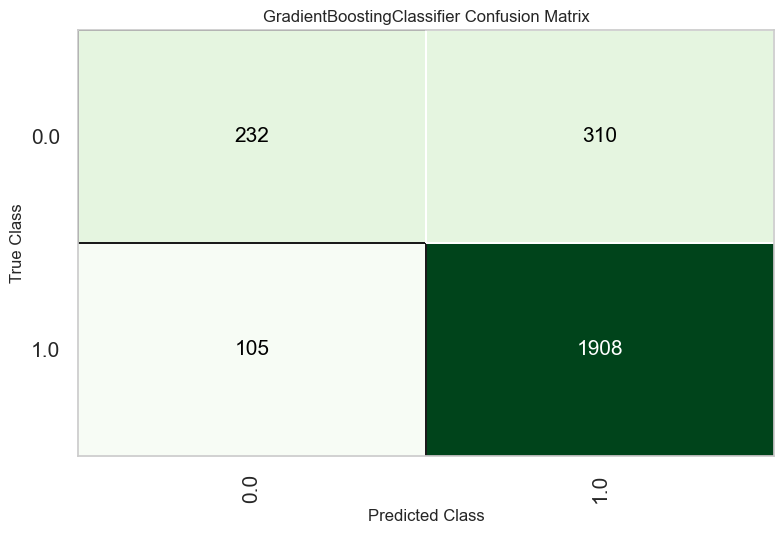

In [62]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

Viendo importancia de las variables en el modelo

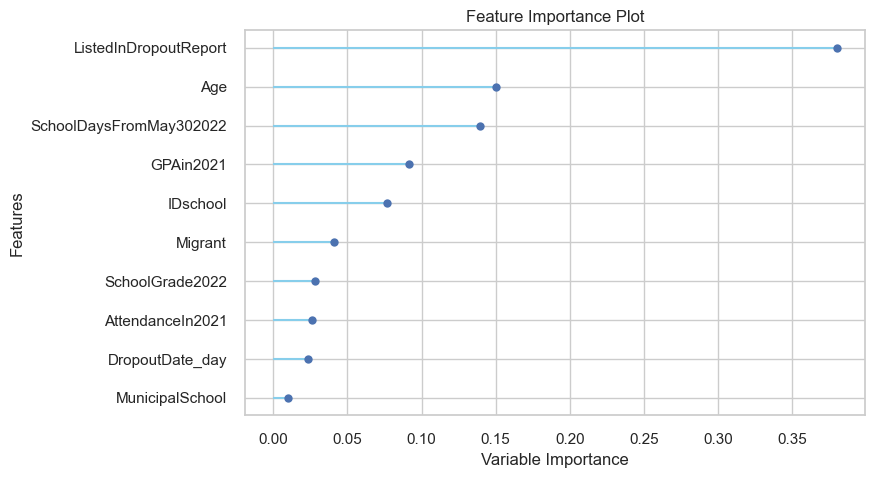

In [63]:
# Gráfico de importancia de variables
plot_model(tuned_gbc, plot='feature')

Como regresión logistica salio bien parada, se le hace un grid search y luego se ve la matriz de confusión y la importancia de las variables.

In [70]:
# 1. Crear el modelo base
lr = create_model('lr')

# 2. Definir la grilla para Regresión Logística
# Cambiamos los parámetros de árboles por parámetros de regularización lineal
params_grid = {
    # 'C': Es la "fuerza" de la regularización (Inverso).
    # Valores pequeños (0.01) = Modelo más simple/general (menos overfitting).
    # Valores grandes (100) = Modelo que intenta ajustarse más a los datos.
    'C': [0.001, 0.01, 0.1, 1, 10, 100],

    # 'class_weight': CRÍTICO para tu caso de deserción.
    # 'balanced': Le da más importancia a la clase minoritaria (los que desertan).
    # None: Trata a todos por igual.
    'class_weight': ['balanced', None],

    # 'solver': El algoritmo matemático para encontrar los pesos.
    # 'liblinear' es muy bueno para datasets pequeños/medianos binarios.
    'solver': ['liblinear', 'lbfgs'] 
}

# 3. Ejecutar el Grid Search
tuned_lr = tune_model(lr,
                      custom_grid = params_grid,
                      optimize = 'AUC')

# 4. Ver resultados
print(tuned_lr)
tuned_lr.get_params()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7906,0.7788,0.9383,0.8212,0.8759,0.2259,0.2483
1,0.8221,0.8167,0.9447,0.8473,0.8934,0.3674,0.3881
2,0.8154,0.8012,0.9383,0.8448,0.8891,0.3480,0.3658
3,0.8205,0.8235,0.9277,0.8566,0.8907,0.3928,0.4028
4,0.8255,0.8306,0.9362,0.8560,0.8943,0.4000,0.4135
5,0.8154,0.8343,0.9403,0.8432,0.8891,0.3487,0.3680
6,0.8272,0.8171,0.9574,0.8440,0.8971,0.3709,0.4018
7,0.7919,0.7855,0.9360,0.8236,0.8762,0.2400,0.2609
8,0.8238,0.8423,0.9531,0.8434,0.8949,0.3631,0.3909


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7504,0.7799,0.7723,0.8963,0.8297,0.3721,0.3869
1,0.7517,0.8206,0.7660,0.9045,0.8295,0.3841,0.4026
2,0.7617,0.7998,0.7809,0.9039,0.8379,0.3974,0.4130
3,0.7215,0.8230,0.7064,0.9222,0.8000,0.3669,0.4042
4,0.7685,0.8268,0.7745,0.9192,0.8406,0.4284,0.4501
5,0.7685,0.8306,0.7825,0.9107,0.8417,0.4196,0.4367
6,0.7500,0.8246,0.7633,0.9040,0.8277,0.3837,0.4025
7,0.7299,0.7895,0.7441,0.8949,0.8126,0.3434,0.3628
8,0.7735,0.8464,0.7825,0.9175,0.8446,0.4363,0.4556


Fitting 10 folds for each of 10 candidates, totalling 100 fits
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


{'C': 1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

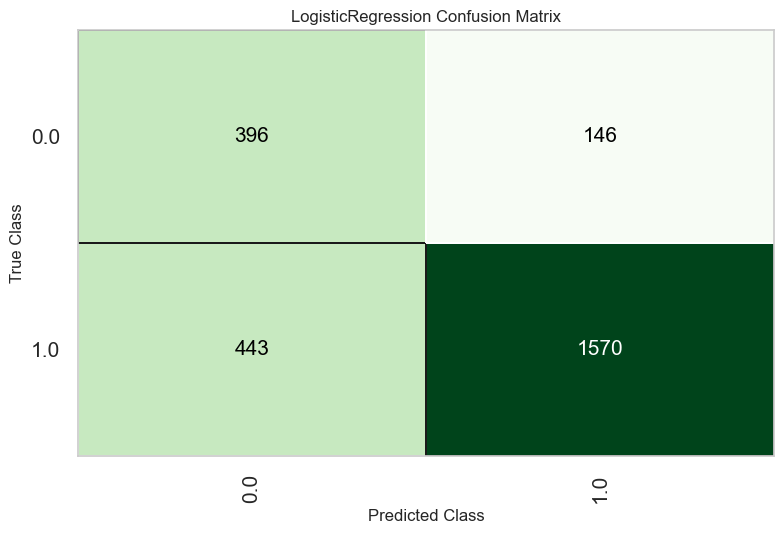

In [65]:
plot_model(tuned_lr, plot = 'confusion_matrix')

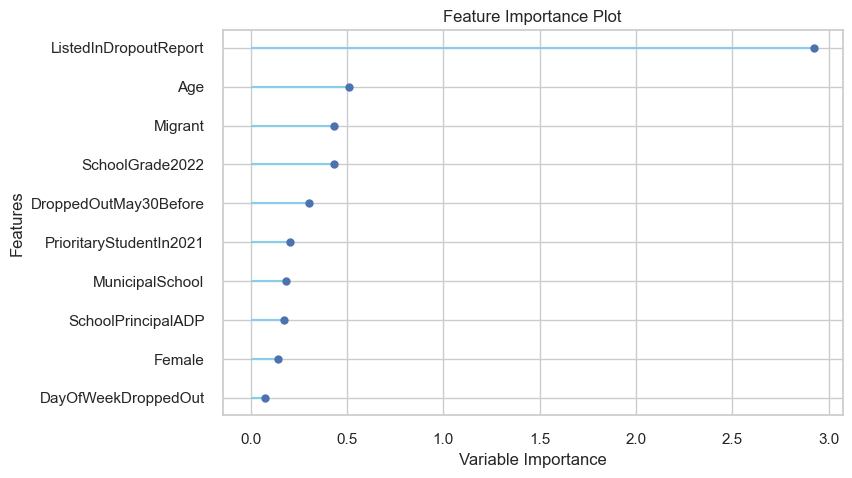

In [66]:
# Gráfico de importancia de variables
plot_model(tuned_lr, plot='feature')

como random forest salio bien parado, se le hace un grid search y luego se ve la matriz de confusión y la importancia de las variables.

In [71]:
# 1. Crear el modelo base
rf = create_model('rf')

# 2. Definir la grilla para Random Forest
params_grid = {
    # Número de árboles en el bosque (más es mejor, pero más lento)
    'n_estimators': [100, 200, 300],

    # Profundidad máxima de cada árbol
    # None = Crece hasta que las hojas sean puras (peligro de overfitting)
    # 10, 20 = Limita el crecimiento para generalizar mejor
    'max_depth': [10, 20, None],

    # Mínimo de datos necesarios para crear una nueva rama (split)
    # Valores altos (ej. 10) evitan reglas demasiado específicas
    'min_samples_split': [2, 5, 10],

    # Mínimo de datos que deben quedar en una hoja final
    # Evita hojas con 1 solo alumno (que sería memorizar)
    'min_samples_leaf': [1, 2, 4],

    # Criterio para medir la calidad de la separación
    'criterion': ['gini', 'entropy'],

    # CRÍTICO: Manejo de desbalance de clases (Desertores vs No Desertores)
    # 'balanced': Ajusta pesos inversamente proporcionales a la frecuencia de clase
    # 'balanced_subsample': Lo mismo, pero calculado para cada árbol (bootstrap)
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# 3. Ejecutar el Grid Search
tuned_rf = tune_model(rf,
                      custom_grid = params_grid,
                      optimize = 'AUC') # Puedes probar 'Recall' si te interesa cazar más desertores

# 4. Ver resultados
print(tuned_rf)
tuned_rf.get_params()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8241,0.7975,0.9532,0.8437,0.8951,0.3633,0.3911
1,0.8322,0.8289,0.9255,0.8700,0.8969,0.4488,0.4550
2,0.8289,0.8292,0.9340,0.8608,0.8959,0.4193,0.4306
3,0.8356,0.8424,0.9319,0.8690,0.8994,0.4528,0.4612
4,0.8372,0.8228,0.9426,0.8635,0.9013,0.4422,0.4564
5,0.8171,0.8494,0.9360,0.8475,0.8896,0.3654,0.3812
6,0.8507,0.8248,0.9574,0.8668,0.9098,0.4818,0.5027
7,0.8003,0.8033,0.9211,0.8405,0.8789,0.3163,0.3274
8,0.8406,0.8239,0.9424,0.8667,0.9030,0.4613,0.4743


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8107,0.8151,0.8915,0.8711,0.8812,0.4165,0.4171
1,0.8037,0.8445,0.8404,0.9039,0.8710,0.4627,0.4681
2,0.8020,0.8337,0.8489,0.8946,0.8712,0.4449,0.4478
3,0.8070,0.8565,0.8383,0.9099,0.8726,0.4775,0.4844
4,0.8238,0.8372,0.8532,0.9176,0.8842,0.5178,0.5239
5,0.8289,0.8634,0.8806,0.8998,0.8901,0.5039,0.5045
6,0.8154,0.8345,0.8614,0.8998,0.8802,0.4795,0.4817
7,0.7819,0.8155,0.8443,0.8742,0.8590,0.3782,0.3793
8,0.8339,0.8540,0.8806,0.9057,0.8930,0.5225,0.5235


Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=300, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

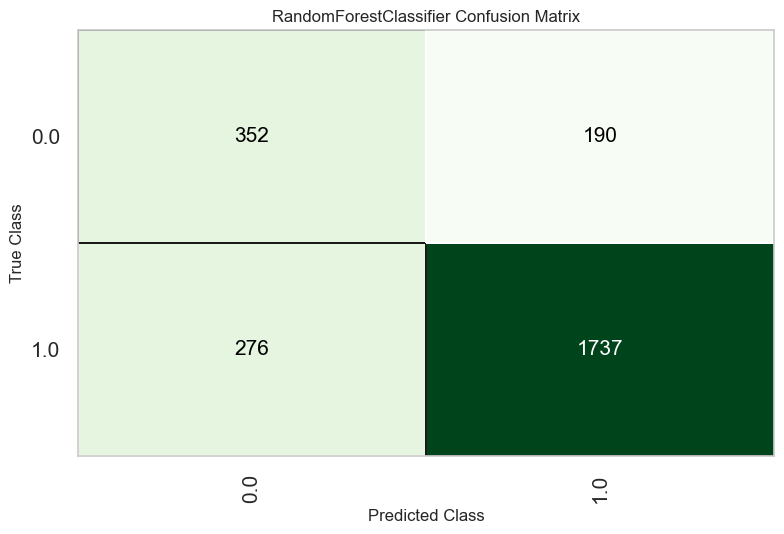

In [68]:
plot_model(tuned_rf, plot = 'confusion_matrix')

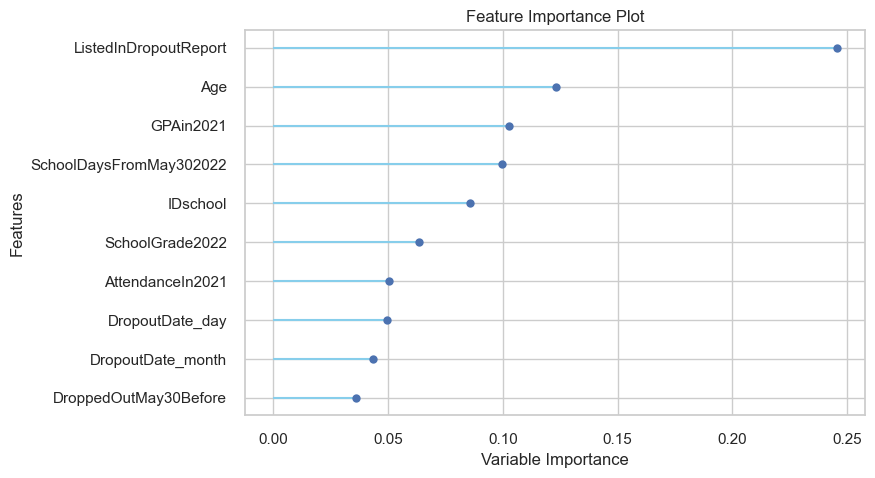

In [69]:
# Gráfico de importancia de variables
plot_model(tuned_rf, plot='feature')